Plot 2. Equity between Women and Men Faculty's salary

I will compute for 'Salary Equity' which, >100 means women get higher salary than man, <100 mean women get less than man,  and the more close equity to 100 means more equal between women and men faculty's salary 

As in plot1, I first import data from 'Faculty Compensation_clean.csv' and extract rows with complete data

In [52]:
import pandas as pd
import numpy as np
f=pd.read_csv('Faculty Compensation_clean.csv')
f=f.drop(['Unnamed: 0'],axis=1)

def complete(row): #return no value is null
    for i in row:
        if pd.isnull(i):
            return False
    return True
f['Complete']=f.apply(complete, axis=1)
f=f.loc[f['Complete']==True, :]

In [53]:
f.head()

,university,Ave. Salary,Avg. Change,Count,Avg. Compensation,Salary Equity,position,State,Category,Complete
0,Abilene Christian University,89000,1.2,66.0,107300.0,90.4,P,TEXAS,Master,True
1,Abilene Christian University,71400,0.4,85.0,87800.0,89.6,AP,TEXAS,Master,True
2,Abilene Christian University,67400,2.5,55.0,81600.0,96.1,aP,TEXAS,Master,True
3,Abilene Christian University,54400,1.5,44.0,71300.0,100.0,I,TEXAS,Master,True
4,Adams State University,65600,-0.3,33.0,67700.0,94.8,P,COLORADO,Baccalaureate,True


Now I will group school category and look at their faculty's Salary and Equity

In [54]:
Cat_E=f.groupby(['Category'])['Salary Equity'].mean()
Cat_S=f.groupby(['Category'])['Ave. Salary'].mean()
Cat=pd.concat([Cat_S,Cat_E], axis=1)
Cat.columns=['Salary','Equity']
Cat=(Cat-Cat.mean())/Cat.std()

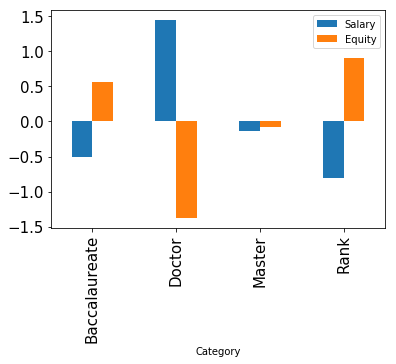

In [55]:
plot2_1=Cat.plot(kind='bar',fontsize=15)

This data shows that a Doctoral School pays its faculty more but with less equity than other school types.
And more important is that Salary and Equity are always in the opposite dirrections, which means higher pey, lower equity

Then I group faculty position and look at their Salary and Equity

In [56]:
Pos_E=f.groupby(['position'])['Salary Equity'].mean()
Pos_S=f.groupby(['position'])['Ave. Salary'].mean()
Pos=pd.concat([Pos_S,Pos_E], axis=1)
Pos=(Pos-Pos.mean())/Pos.std()
Pos.columns=['Salary','Equity' ]

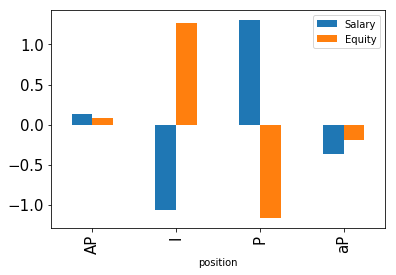

In [57]:
plot1_2=Pos.plot(kind='bar',fontsize=15)

As I can see, again, Salary and Equity are in the opposite dirrections, which means higher pey, lower equity

So I ploted the salary vs equity map

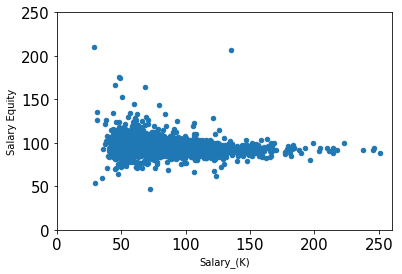

In [58]:
f['Salary_(K)']=f['Ave. Salary']/1000
plot_2=f.plot(x='Salary_(K)', y='Salary Equity',kind='scatter', ylim=[0,250],xlim=[0,260],fontsize=15)

This data looks to me at fist glance that women faculty are paid more at lower salary end and mens are payed more at the high pay end. So I want to drow a line with equity =100

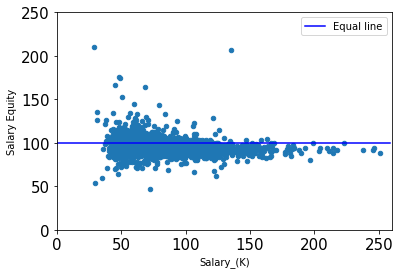

In [59]:
plot_2=f.plot(x='Salary_(K)', y='Salary Equity',kind='scatter', ylim=[0,250],xlim=[0,260],fontsize=15)
Ones=pd.Series(np.ones(260)*100,name='Equal line')
Ones.plot(legend=True,color='b')

So, I was actually fooled by the scatter plot. With the Equity=100 line, we can see that on both end women are paied less than man and the unequity is worse on the high paying end.

Now, let me do a linear regression on Salary over Equity

In [65]:
import statsmodels.formula.api as smf

dataFit=f.loc[:,['Salary Equity', 'Salary_(K)']]
dataFit.columns=['A','B']
FD=smf.ols(formula="A~B", data=dataFit).fit()

In [66]:
FD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      A   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     135.3
Date:                Mon, 23 Jul 2018   Prob (F-statistic):           1.34e-30
Time:                        03:32:18   Log-Likelihood:                -10322.
No. Observations:                2907   AIC:                         2.065e+04
Df Residuals:                    2905   BIC:                         2.066e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    101.8427      0.488    208.517      0.000     100.885     102.800
B             -0.0660      0.006    -11.632      0.000      -0.077      -0.055
==============================================================================
Omnibus:                     2032.541   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           123866.394
Skew:                           2.667   Prob(JB):                         0.00
Kurtosis:                      34.531   Cond. No.                         269.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
FD.params

Intercept    101.842681
B             -0.065971
dtype: float64

The Fitting result 'FD' shows very clear that Salary('B') has a negetive coefficient on Equity('A').
Now I want to put both the Equity =100 line and a linear regression fitting line to plot_2

In [68]:
Ones=pd.Series(np.ones(260)*100,name='Equal line')
Y=pd.DataFrame({'B': range(260)})
Fit=FD.predict(Y)
Fit.name='Fit line'

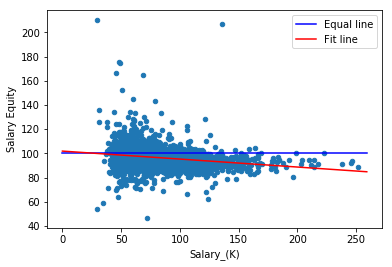

In [69]:
plot_2=f.plot(x='Salary_(K)', y='Salary Equity',kind='scatter')
Ones.plot(legend=True,color='b')
Fit.plot(legend=True,color='r')

In plot_2: dots are scatter data for Salary vs Equity; 
           Blue line is the Equity=100 line; 
           Red line is the fitting line from Linear regression. 
It is very clear that the fitting line is smaller than the Equity=100 line for all Salary range and when the salary goes higher, the Fitting line goes lower. 
This means that their is still some what prelivage over man in faculty 